In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime
from time import time
from tqdm import tqdm_notebook as tqdm

# load dataset
data_attck = pd.read_csv('datasets/training_data/training_data_attacks.csv', dtype=np.longdouble) 
data_train = pd.read_csv('datasets/training_data/training_data.csv', dtype=np.longdouble)

## Preparation and feature selection

In [4]:
# Select features (all or multiple)
# these features were found best from the feature selection notebook!
%run utils/ui_feature_selection.py

A Jupyter Widget

In [5]:
# make sure all features exist in the datasets
mask_tmp = []
for m in mask_init:
    if (m in data_train.columns.values) and \
            (m in data_attck.columns.values):
        mask_tmp.append(m)
mask = mask_tmp

# data_chal2 = data_chal2.loc[:,mask] # not possible for chal2
mask.append('label')
data_train = data_train.loc[:,mask]
data_attck = data_attck.loc[:,mask]

# sanity checks
# data_attck = data_attck.drop(['Unnamed: 0'], axis=1)
print(data_attck.isnull().values.any())
print(data_train.isnull().values.any())

# Columns matching
for i, c in enumerate(data_attck.columns.values):
#     assert data_chal2.columns[i] == c
#     assert data_chal1.columns[i] == c
    assert data_train.columns[i] == c

False
True


True


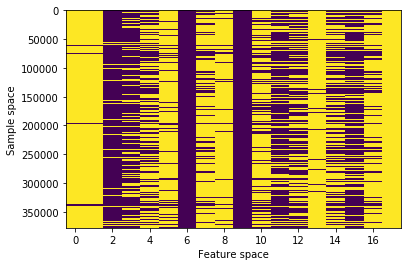

total number of null cells:  4094654


In [6]:
# Check Nan values
print(data_train.isnull().values.any())
plt.imshow(data_train.isnull(), aspect='auto')
plt.xlabel('Feature space')
plt.ylabel('Sample space')
plt.show()

print("total number of null cells: ", np.sum(np.sum(data_train.isnull())))
np.sum(data_train.isnull())

data_train['label'].fillna(0, inplace=True)

## Train

In [7]:
# Some global settings for the training process
# Instructions:
#   You probaby want to run first with 'hard voting' where considers most frequent
#   result from models. Then based on the result of each model, run the second time 
#   with 'soft voting' where considers each model with a weight and you can hand tune!
#   random state is only to ensure replicatability!
#   NB: weights only effective under 'soft' voting!
%run utils/ui_train_control.py

Model Weights: 


A Jupyter Widget

A Jupyter Widget

In [41]:
from sklearn import *
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn import model_selection

col = [c for c in data_attck if c not in ['label']]

X = data_attck[col] 
y = data_attck['label']

print("Global settings: ")
print("\tModels weights: ", weights)
print("\tVoting type: ", voting_type)
print("\trandom state: ", rs)

# Models
clf1 = ensemble.RandomForestClassifier(random_state=rs, max_depth=8, n_jobs=-1)
clf2 = ensemble.AdaBoostClassifier(random_state=rs, n_estimators=100, learning_rate=0.1)
clf3 = ensemble.ExtraTreesClassifier(random_state=rs, max_depth=8, n_jobs=-1)
clf4 = ensemble.BaggingClassifier(random_state=rs, n_jobs=-1)
eclf = ensemble.VotingClassifier(estimators=[('rf', clf1), ('ada', clf2), 
                                             ('xtr', clf3), ('bg', clf4)], 
                                 voting=voting_type, weights=weights)

# Fit the models
print("\nfitting..")
for clf in tqdm([clf1, clf2, clf3, clf4, eclf], total=5):
    clf.fit(X,y)
    clf.fit(X,y)
    clf.fit(X,y)
    clf.fit(X,y)
    clf.fit(X,y)

# Cross-validation evaluation
print("\nevaluating..")
for clf, label in tqdm(zip([clf1, clf2, clf3, clf4, eclf], \
                      ['Random Forest', 'AdaBoost', 
                       'Extra Trees', 'Bagging', 'Voting Ensemble']), total=5):
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
    print("f1-score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Global settings: 
	Models weights:  [1, 1, 2, 4]
	Voting type:  soft
	random state:  3

fitting..


A Jupyter Widget



evaluating..


A Jupyter Widget

f1-score: 0.99 (+/- 0.02) [Random Forest]
f1-score: 1.00 (+/- 0.00) [AdaBoost]
f1-score: 0.92 (+/- 0.04) [Extra Trees]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loop

f1-score: 1.00 (+/- 0.00) [Bagging]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array i

f1-score: 1.00 (+/- 0.00) [Voting Ensemble]



## Classifiers debugging

In [42]:
%run utils/roc_auc.py
    
from ipywidgets import interact
import ipywidgets as widgets

get_classifier = {
    'Random Forest': clf1,
    'AdaBoost': clf2, 
    'ExtraTrees': clf3, 
    'Bagging': clf4, 
    'Voting': eclf
}

def map_classifiers(classifier):
    if classifier == '':
        return
    classifier_roc(get_classifier[classifier], X, y)

interact(map_classifiers, classifier=['', 'Random Forest','AdaBoost', 'ExtraTrees', 'Bagging', 'Voting']);


A Jupyter Widget

## Test and Prediction Result

In [51]:
from sklearn.metrics import mean_squared_error as mse

data_test = pd.read_csv("datasets/testing_data/testing_data.csv")
X_test = data_test.loc[:,mask[:-1]]
# X_test = X.loc[np.random.randint(0, len(X), 100), :]
# y_test = y.loc[np.random.randint(0, len(X), 100)] # Not on the final dataset۱

y_pred = eclf.predict(X_test)
# print("MSE: ", mse(y_test, y_pred))
# print("f1-score: ", f1_score(y_test, y_pred, average='macro'))

result = pd.DataFrame(y_pred, index=X_test.index, columns=['Prediction'])
result.to_csv("predictions.csv")
print("total number of attacks detected: ", result['Prediction'].sum())


print("Individual models prediction: ")
y_pred1 = clf1.predict(X_test)
print("\ttotal number of attacks model 1: ", np.sum(y_pred1))
y_pred2 = clf2.predict(X_test)
print("\ttotal number of attacks model 2: ", np.sum(y_pred2))
y_pred3 = clf3.predict(X_test)
print("\ttotal number of attacks model 3: ", np.sum(y_pred3))
y_pred4 = clf4.predict(X_test)
print("\ttotal number of attacks model 4: ", np.sum(y_pred4))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



total number of attacks detected:  33.0
Individual models prediction: 
	total number of attacks model 1:  33.0
	total number of attacks model 2:  33.0
	total number of attacks model 3:  14.0
	total number of attacks model 4:  33.0


## Visualization

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
pca_train = pca.fit_transform(X_scaled)
pca_test = pca.transform(X_test_scaled)

### PCA on Train Data

In [55]:
# Reorder the labels to have colors matching the cluster results
ycol = np.choose(y.astype(int), [1, 2, 0]).astype(np.float)

layout = go.Layout(scene=
                   dict(
                        xaxis=dict(ticks='', showticklabels=False),
                        yaxis=dict(ticks='', showticklabels=False),
                        zaxis=dict(ticks='', showticklabels=False),
                       )
                  )

trace = go.Scatter3d(x=pca_train[:, 0], y=pca_train[:, 1], z=pca_train[:, 2], 
                     mode='markers',
                     marker=dict(color=ycol,
                                 line=dict(color='black', width=1))
                     )

fig = go.Figure(data=[trace], layout=layout)
plotly.offline.plot(fig, filename='signalingheroes_traindata.html')

'file:///home/novin/workspace/ericsson/signaling_heroes/signalingheroes_traindata.html'

### PCA on test Data

In [54]:
# Reorder the labels to have colors matching the cluster results
ycol = np.choose(y_test.astype(int), [1, 2, 0]).astype(np.float)

trace = go.Scatter3d(x=pca_test[:, 0], y=pca_test[:, 1], z=pca_test[:, 2], 
                     mode='markers',
                     marker=dict(color=ycol,
                                 line=dict(color='black', width=1))
                     )

fig = go.Figure(data=[trace], layout=layout)
plotly.offline.plot(fig, filename='signalingheroes_traindata.html')

'file:///home/novin/workspace/ericsson/signaling_heroes/signalingheroes_traindata.html'